In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [2]:
# 2. Đọc file dữ liệu và chia train test theo tỉ lệ 7:3
df = pd.read_csv('../../Dataset/ACB-Historical-Data_Group-9.csv')
df["Price"] = df["Price"].str.replace(',', '').astype(float)
df = df[['Date','Price']]

data = df[['Price']]
data = data.dropna()
data = data.reset_index(drop=True) 


In [3]:
df

,Date,Price
0,3/1/2019,11361.0
1,3/4/2019,11512.4
2,3/5/2019,11474.6
3,3/6/2019,11474.6
4,3/7/2019,11550.3
...,...,...
1303,5/27/2024,29450.0
1304,5/28/2024,29650.0
1305,5/29/2024,29250.0
1306,5/30/2024,25565.2


In [4]:
data

,Price
0,11361.0
1,11512.4
2,11474.6
3,11474.6
4,11550.3
...,...
1303,29450.0
1304,29650.0
1305,29250.0
1306,25565.2


In [5]:
# 2. Đọc file dữ liệu và chia train test validate theo tỉ lệ 7:3
train_size = int(0.7 * len(data))

train_data = data[:train_size]
test_data = data[train_size:]

In [6]:
# 3. Preparing the data

x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)

In [7]:
# 4.  Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [8]:
# 5. Predict on test set
y_pred = model.predict(x_test)

In [9]:
# 7. RMSE, MAPE, MAE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mape = np.mean(np.abs((y_test - y_pred) / y_pred)) * 100
test_mae = np.mean(np.abs(y_test - y_pred))

print("Mean Absolute Percentage Error (MAPE):", test_mape)
print("Mean Absolute Error (MAE):", test_mae)
print("Root Mean Squared Error (RMSE):", test_rmse)

Mean Absolute Percentage Error (MAPE): 25.128322976330068
Mean Absolute Error (MAE): 7493.918617111865
Root Mean Squared Error (RMSE): 7607.335015935847


In [10]:
# 7.1. Predicted closing prices for the next 30 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
x_next_30_days = np.array(range(last_index, last_index+30)).reshape(-1, 1)

y_next_30_days = model.predict(x_next_30_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print(last_data)

Predicted closing prices for the next 30 days:
[[33844.13516961]
 [33863.02031403]
 [33881.90545846]
 [33900.79060289]
 [33919.67574732]
 [33938.56089175]
 [33957.44603618]
 [33976.33118061]
 [33995.21632504]
 [34014.10146947]
 [34032.9866139 ]
 [34051.87175833]
 [34070.75690276]
 [34089.64204719]
 [34108.52719162]
 [34127.41233605]
 [34146.29748048]
 [34165.18262491]
 [34184.06776934]
 [34202.95291377]
 [34221.8380582 ]
 [34240.72320263]
 [34259.60834706]
 [34278.49349149]
 [34297.37863592]
 [34316.26378035]
 [34335.14892478]
 [34354.03406921]
 [34372.91921364]
 [34391.80435807]]
RangeIndex(start=1307, stop=1337, step=1)


In [11]:
# 7.2. Predicted closing prices for the next 60 days
last_index =  data.index[-1]
last_data_60 = pd.RangeIndex(start=last_index+1, stop=last_index+61, step=1)
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

y_next_60_days = model.predict(x_next_60_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_60_days)

Predicted closing prices for the next 30 days:
[[33863.02031403]
 [33881.90545846]
 [33900.79060289]
 [33919.67574732]
 [33938.56089175]
 [33957.44603618]
 [33976.33118061]
 [33995.21632504]
 [34014.10146947]
 [34032.9866139 ]
 [34051.87175833]
 [34070.75690276]
 [34089.64204719]
 [34108.52719162]
 [34127.41233605]
 [34146.29748048]
 [34165.18262491]
 [34184.06776934]
 [34202.95291377]
 [34221.8380582 ]
 [34240.72320263]
 [34259.60834706]
 [34278.49349149]
 [34297.37863592]
 [34316.26378035]
 [34335.14892478]
 [34354.03406921]
 [34372.91921364]
 [34391.80435807]
 [34410.6895025 ]
 [34429.57464693]
 [34448.45979136]
 [34467.34493578]
 [34486.23008021]
 [34505.11522464]
 [34524.00036907]
 [34542.8855135 ]
 [34561.77065793]
 [34580.65580236]
 [34599.54094679]
 [34618.42609122]
 [34637.31123565]
 [34656.19638008]
 [34675.08152451]
 [34693.96666894]
 [34712.85181337]
 [34731.7369578 ]
 [34750.62210223]
 [34769.50724666]
 [34788.39239109]
 [34807.27753552]
 [34826.16267995]
 [34845.04782438]

In [12]:
# 7.3. Predicted closing prices for the next 90 days
last_index =  data.index[-1]
last_data_90 = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)
x_next_90_days = np.array(range(last_index, last_index+90)).reshape(-1, 1)

y_next_90_days = model.predict(x_next_90_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_90_days)

Predicted closing prices for the next 30 days:
[[33844.13516961]
 [33863.02031403]
 [33881.90545846]
 [33900.79060289]
 [33919.67574732]
 [33938.56089175]
 [33957.44603618]
 [33976.33118061]
 [33995.21632504]
 [34014.10146947]
 [34032.9866139 ]
 [34051.87175833]
 [34070.75690276]
 [34089.64204719]
 [34108.52719162]
 [34127.41233605]
 [34146.29748048]
 [34165.18262491]
 [34184.06776934]
 [34202.95291377]
 [34221.8380582 ]
 [34240.72320263]
 [34259.60834706]
 [34278.49349149]
 [34297.37863592]
 [34316.26378035]
 [34335.14892478]
 [34354.03406921]
 [34372.91921364]
 [34391.80435807]
 [34410.6895025 ]
 [34429.57464693]
 [34448.45979136]
 [34467.34493578]
 [34486.23008021]
 [34505.11522464]
 [34524.00036907]
 [34542.8855135 ]
 [34561.77065793]
 [34580.65580236]
 [34599.54094679]
 [34618.42609122]
 [34637.31123565]
 [34656.19638008]
 [34675.08152451]
 [34693.96666894]
 [34712.85181337]
 [34731.7369578 ]
 [34750.62210223]
 [34769.50724666]
 [34788.39239109]
 [34807.27753552]
 [34826.16267995]

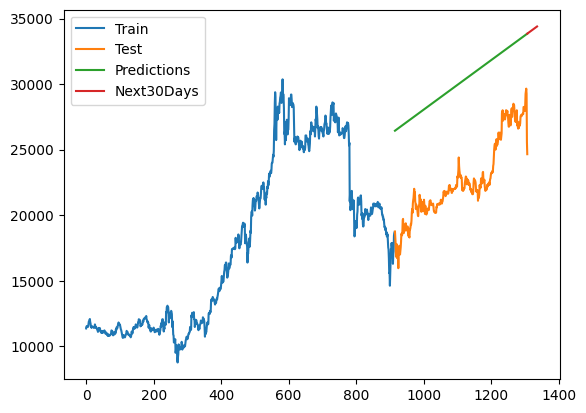

In [13]:
# 8.1. Plotting
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Days'])
plt.show()

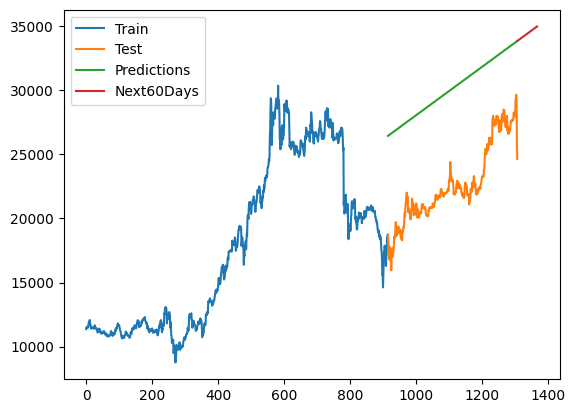

In [14]:
# 8.2. Plotting
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data_60,y_next_60_days)
plt.legend(['Train', 'Test', 'Predictions','Next60Days'])
plt.show()

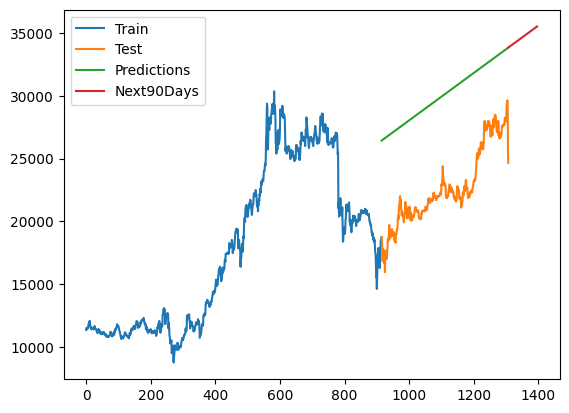

In [15]:
# 8.3. Plotting
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data_90,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next90Days'])
plt.show()